In [8]:
import scanpy as sc
import numpy as np

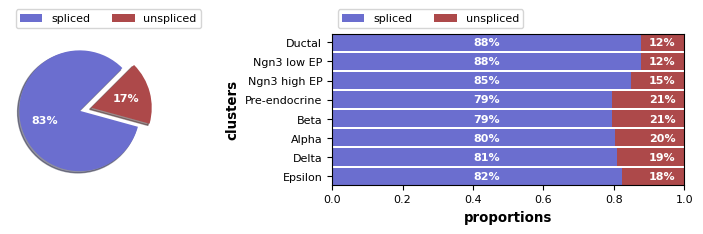

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


(3696, 50)

In [2]:
import scvelo as scv
##%matplotlib qt

##scv.set_figure_params()
adata = scv.datasets.pancreas()
scv.pl.proportions(adata)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata)
##scv.tl.velocity_graph(adata)
##scv.tl.velocity_graph(adata, basis='pca')

scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata, basis='pca')

adata.obsm['velocity_pca'].shape

In [3]:
sc.tl.umap(adata, n_components=3, random_state=66)

In [4]:
scv.tl.velocity_embedding(adata, basis='umap')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [46]:
import umap
u = umap.UMAP(n_components=3, random_state=66)

In [47]:
umap1 = u.fit_transform(np.vstack([adata.X.toarray(), adata.X.toarray()+adata.layers['velocity']]))
adata.obsm['velocity_umap_1s'] = umap1[3696:]-umap1[:3696]

In [48]:
umap1 = u.fit_transform(np.vstack([adata.X.toarray(), adata.X.toarray()+10*adata.layers['velocity']]))
adata.obsm['velocity_umap_10s'] = umap1[3696:]-umap1[:3696]

In [49]:
adata.obsm['velocity_umap_1s']

array([[ 1.5334108 , -3.7253466 , -0.3669424 ],
       [14.040859  , -9.392837  , -1.4424601 ],
       [ 1.5137537 , -3.2562866 , -0.12257099],
       ...,
       [13.537488  , -8.203554  , -1.4079783 ],
       [ 2.299469  , -2.7551513 , -0.45604455],
       [ 2.5371814 , -2.2709157 ,  0.17240596]], dtype=float32)

In [50]:
adata.obsm['velocity_umap_10s']

array([[ -9.530043  ,   2.2134383 ,  -6.932283  ],
       [-24.603642  ,  -0.19988036,   2.964139  ],
       [ -9.177728  ,   2.3695652 ,  -7.8322425 ],
       ...,
       [-24.627016  ,  -1.5029349 ,   4.110363  ],
       [ -9.059358  ,   2.5490158 ,  -8.598187  ],
       [-11.229574  ,   3.5626376 ,  -8.073626  ]], dtype=float32)

In [43]:
adata.write('pancrease_velocity.h5ad')

In [6]:
import seaborn as sns

In [9]:
map_dict = {}
for i, j in zip(np.arange(len(adata.obs.clusters.astype('category').cat.categories)), adata.obs.clusters.astype('category').cat.categories):
    map_dict[j] = i

In [10]:
adata.obs.clusters.cat.categories

Index(['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta',
       'Alpha', 'Delta', 'Epsilon'],
      dtype='object')

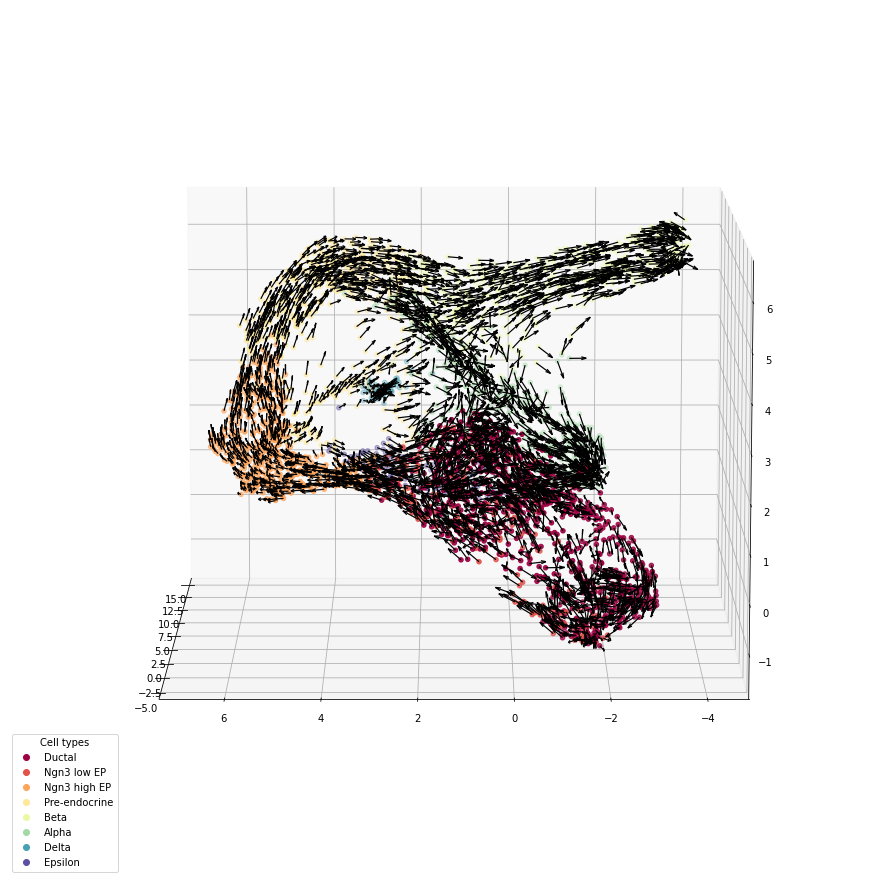

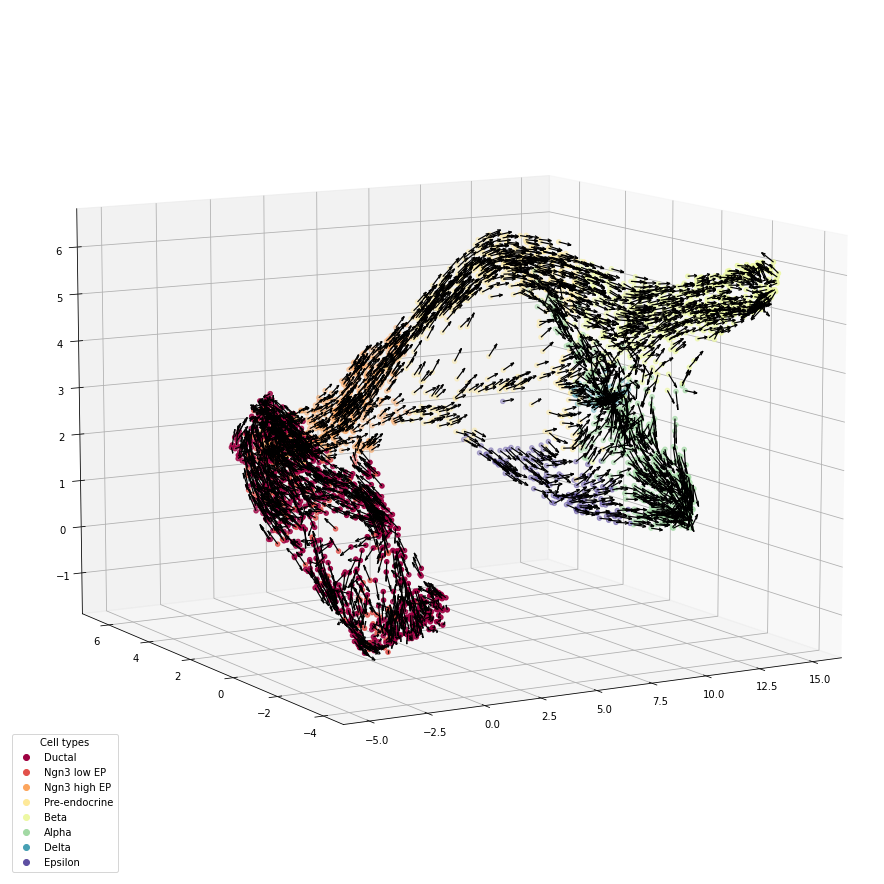

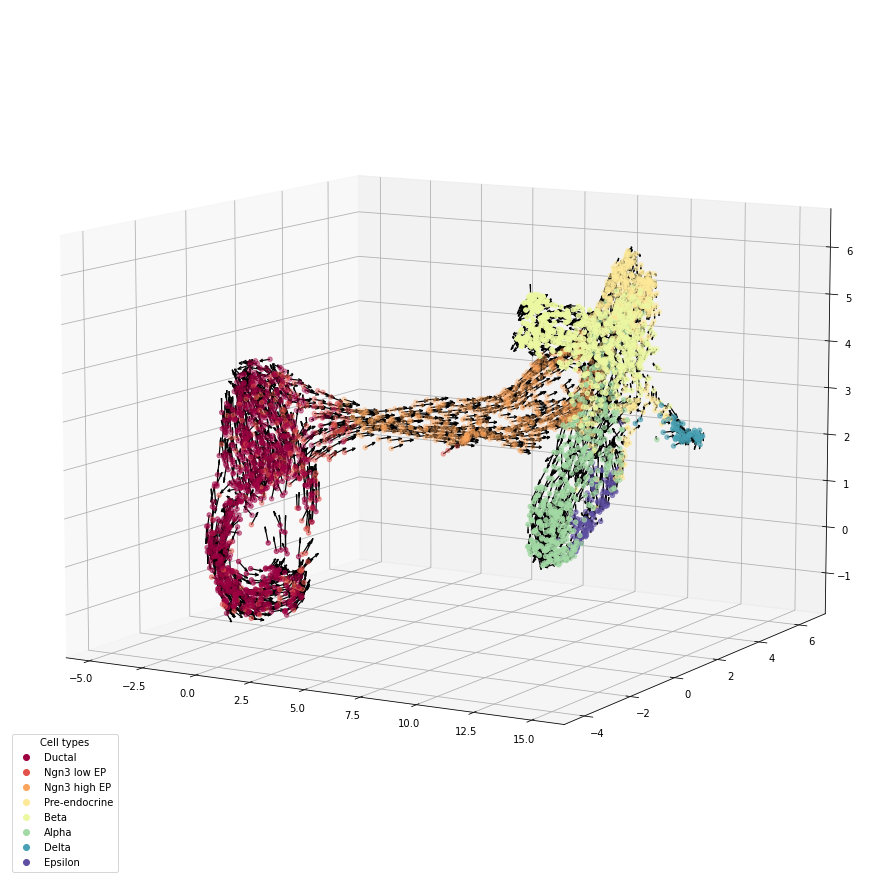

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

for ii in range(180,360,60):    
    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=10., azim=ii)

    
    ax.quiver(adata.obsm['X_umap'][:, 0], 
              adata.obsm['X_umap'][:, 1],
              adata.obsm['X_umap'][:, 2], 
              adata.obsm['velocity_umap'][:, 0], 
              adata.obsm['velocity_umap'][:, 1],
              adata.obsm['velocity_umap'][:, 2], length=0.4, normalize=True, linewidth=1.2, color='black')

    scatter = ax.scatter(adata.obsm['X_umap'][:, 0],
                         adata.obsm['X_umap'][:, 1],
                         adata.obsm['X_umap'][:, 2],
                         c=adata.obs.clusters.astype('category').map(map_dict).values.astype('int32'),
                         cmap='Spectral')

    plt.legend(handles=scatter.legend_elements()[0],
               labels=adata.obs.clusters.cat.categories.tolist(),
               loc="lower left", title="Cell types")

In [13]:
!pwd

/Users/qq06/Documents/singlecellvr/examples


In [14]:
adata.write('pancrease_velocity.h5ad')